<p align="center">
  <img src="https://campus.fi.uba.ar/img/fiuba-footer-logo.png" height="180"/>
</p>

<p align="center">
<font size="+3">
[75.06] Organizacion de Datos - Curso Rodriguez
<br>
Trabajo Práctico 1 - Propiedades en Venta
<br>
2024 2°C
<br>
Grupo 8
</font>
</p>
<br>

---

<br>
<font size="+2">
Integrantes
</font>
<br>
<font size="+1">
<ul align="center">
<li>Pratto, Federico Nicolas - 96.223</li>
<li>Ramirez, Jose Israel - 93.751</li>
<li>Testa, Santiago Tomas - 108.301</li>
<li>Torres, Santiago/Danny - 108.061</li>
</ul>
</font>

</p>

<br>
<br>

## 1. Imports y carga de archivos

Importamos las librerias que vamos a utilizar.

In [63]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.font_manager
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import seaborn as sns

import numpy as np
import scipy.stats as st

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None

In [64]:
# Ruta donde van a estar todos los datasets
ruta = "https://raw.githubusercontent.com/sttesta3/7506R-1C2024-GRUPO08/fede/datasets/"

Importamos el dataset de Properati

In [65]:
ds_original = pd.read_csv(ruta + "properati_argentina_2021.csv")
ds_properati = ds_original.copy()



---



## 2. Análisis Exploratorio y Preprocesamiento de Datos

El objetivo será explorar y preparar los datos para poder trabajar con los distintos modelos de aprendizaje automático.

Se deben filtrar únicamente los anuncios de propiedades de tipo vivienda (Casa, PH y Departamento) ubicados en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

### 2.1. Exploración Inicial

Analizar cada variable, considerando los siguientes aspectos:

* Variables Cuantitativas: Calcular medidas de resumen (media, mediana, moda,
etc)
* Variables Cualitativas: Mostrar cantidad de valores posibles, y frecuencias de cada uno.
* Determinar variables irrelevantes en el análisis.
* Realizar un análisis gráfico de las distribuciones de las variables más relevantes.
* Analizar las correlaciones existentes entre las variables.

#### 2.1.1. Analisis inicial

Comenzaremos haciendo un analisis inicial del contenido del dataset, asi como agrupando las variables segun su tipo.


In [66]:
ds_properati_shape = ds_properati.shape
print(f"Nuestro dataset esta compuesto por {ds_properati_shape[0]} publicaciones (filas) y {ds_properati_shape[1]} variables (columnas)")

Nuestro dataset esta compuesto por 460154 publicaciones (filas) y 20 variables (columnas)


In [67]:
ds_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [68]:
ds_properati.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Clasificando las variables presentes en este dataset las dividiremos en :
- Cualitativas (categoricas):
    - Ordinales
    - Nominales
- Cuantitativas (numericas):
    - Discretas
    - Continuas


---



Las variables **cuantitativas** observadas en el dataset son:

- `latitud` (continua): Latitud en la que se encuentra la propiedad.
- `longitud` (continua): Longitud en la que se encuentra la propiedad.
- `property_rooms` (discreta): Cantidad de ambientes con los que cuenta de la propiedad.
- `property_bedrooms` (discreta): Cantidad de dormitorios con los que cuenta la propiedad.
- `property_surface_total` (continua): Superficie total que ocupa la propiedad.
- `property_surface_covered` (continua): Superficie de terreno cubierta con que cuenta la propiedad.
- `property_price` (continua): Precio de la propiedad

</br>

Ademas, contamos con las siguientes variables, que si bien estas anotadas como `Strings`, al ser fechas, son variables cuantitativas y las mismas seran casteadas a tipo `date`.

- `start_date` (discreta): Fecha de alta del aviso.
- `end_date` (discreta): Fecho de baja del aviso.
- `created_on` (discreta): Fecha de alta de la primera versión del aviso.

In [69]:
# Casteo las variables start_date, end_date y created_on como tipo date.
variables_a_castear = [
    "start_date",
    "end_date",
    "created_on"
    ]

for variable in variables_a_castear:
  ds_properati[variable] = pd.to_datetime(ds_properati[variable], errors='coerce')

A continuacion se muestran las medidas de resumen de las variables mencionadas:

In [70]:
variables_cuantitativas = ds_properati.select_dtypes(exclude = "object").columns.to_list()
variables_cuantitativas.remove("place_l6") # Quito esta fila, pues es cualitativa
ds_properati[variables_cuantitativas].describe()

,start_date,end_date,created_on,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,460154,432807,460154,419740.000000,419740.000000,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,2021-06-30 21:27:58.650190848,2021-09-09 12:02:39.002973440,2021-06-30 21:27:58.650190848,-34.228570,-59.557066,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
min,2021-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,-54.832057,-103.219258,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,2021-04-05 00:00:00,2021-06-05 00:00:00,2021-04-05 00:00:00,-34.640132,-58.899343,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,2021-06-30 00:00:00,2021-08-28 00:00:00,2021-06-30 00:00:00,-34.585122,-58.488309,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,2021-09-25 00:00:00,2022-01-27 00:00:00,2021-09-25 00:00:00,-34.423414,-58.404876,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,2021-12-31 00:00:00,2022-09-19 00:00:00,2021-12-31 00:00:00,42.557773,-35.044991,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09
std,NaN,NaN,NaN,3.251509,2.905129,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06


In [71]:
# Muestreo el porcentaje de entradas nulas en cada variable cuantitativa.
cantidad_de_filas = ds_properati.shape[0]
for variable in variables_cuantitativas:
  cantidad_de_nulos = ds_properati[variable].isnull().sum()
  porcentaje_de_nulos = round(100 * cantidad_de_nulos / cantidad_de_filas, 2)
  print(f"La variable \"{variable}\" tiene un {porcentaje_de_nulos}% de valores NULOS!")

La variable "start_date" tiene un 0.0% de valores NULOS!
La variable "end_date" tiene un 5.94% de valores NULOS!
La variable "created_on" tiene un 0.0% de valores NULOS!
La variable "latitud" tiene un 8.78% de valores NULOS!
La variable "longitud" tiene un 8.78% de valores NULOS!
La variable "property_rooms" tiene un 19.92% de valores NULOS!
La variable "property_bedrooms" tiene un 25.22% de valores NULOS!
La variable "property_surface_total" tiene un 13.55% de valores NULOS!
La variable "property_surface_covered" tiene un 7.01% de valores NULOS!
La variable "property_price" tiene un 3.91% de valores NULOS!


En cuanto a variables **cualitativas**, se tienen:

- `id` (nominal): ID de la propiedad.
- `operation` (nominal): Tipo de operación (venta, alquiler, etc.)
- `place_l2` (nominal): Nivel de division administrativa 2, correspondiente a la provincia donde se encuentra la propiedad.
- `place_l3` (nominal): Nivel de division administrativa 3, correspondiente a la ciudad donde se encuentra la propiedad.
- `place_l4` (nominal): Nivel de division administrativa 4, correspondiente al barrio donde se encuentra la propiedad.
- `place_l5` (nominal): Nivel de division administrativa 5. No tiene una equivalencia definida por documentación.
- `place_l6` (nominal): Nivel de division administrativa 6. No tiene una equivalencia definida por documentación.
- `property_type` (nominal): Tipo de propiedad (Casa, Departamento, PH)
- `property_currency` (nominal): Moneda correspondiente al precio publicado.
- `property_title` (nominal): Titulo del anuncio.


In [72]:
# Listamos todas las variables cualitativas.
variables_cualitativas = ds_properati.select_dtypes("object").columns.to_list()
variables_cualitativas.remove("id") # Remuevo la variable ID pues carece de sentido analizarla.
variables_cualitativas.append("place_l6") # Agrego la variable place_l6 pues esta mal clasificada.
variables_cualitativas.sort()

# Muestreo mis variables.
for variable in variables_cualitativas:
  print(f"La variable \"{variable}\" cuanta con los siguientes valores:\n")
  print(ds_properati[variable].value_counts())

  # Si una variable tiene valores nulos, muestro el porcentaje de los mismos.
  cantidad_de_nulos = ds_properati[variable].isnull().sum()
  cantidad_de_filas = ds_properati.shape[0]
  if(cantidad_de_nulos != 0):
    porcentaje_de_nulos = round(100 * cantidad_de_nulos / cantidad_de_filas, 2)
    print(f"\n¡CUIDADO, esta variable tiene {porcentaje_de_nulos}% de valores NULOS!")

  # Separador
  print("\n*******************************************\n")

La variable "operation" cuanta con los siguientes valores:

operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64

*******************************************

La variable "place_l2" cuanta con los siguientes valores:

place_l2
Capital Federal                 157563
Bs.As. G.B.A. Zona Norte         89693
Santa Fe                         47861
Bs.As. G.B.A. Zona Sur           47754
Bs.As. G.B.A. Zona Oeste         28352
Córdoba                          22528
Buenos Aires Costa Atlántica     12457
Neuquén                           8788
Montevideo                        7494
Buenos Aires Interior             6274
Maldonado                         5540
Mendoza                           5395
Río Negro                         5280
Tucumán                           3571
Colonia                           2535
Salta                             1537
Entre Ríos                        1216
San Juan                           997
La P

####2.1.2. Filtrado inicial

En esta seccion nos vamos a encargar de hacer un filtrado inicial de los datos para depurar lo mas posible el dataset.

Antes de continuar, vamos a filtrar nuestro dataset para quedarnos solo con el tipo de anuncio que nos fue indicado en el enunciado.

* Tipo de propiedad (`property_type`): Casa, Departamento o PH
* Tipo de moneda (`property_currency`): USD
* Tipo de operación (`operation`): Venta
* Provincia (`place_l2`): Capital Federal

</br>

**NOTA:** Como vimos al final de la sección anterior, hay un 4,03% de propiedades en las cuales figura un valor nulo en la variable `property_currency`, dado que representa una porción relativamente pequeña de nuestro dataset, no seran tenidas en cuenta al momento del filtrado de datos.

In [73]:
# Muestro el tamaño actual del dataset.
ds_properati_shape = ds_properati.shape
print(f"Tamaño del dataset previo al filtrado: {ds_properati_shape[0]} publicaciones (filas) y {ds_properati_shape[1]} variables (columnas)")

# Filtro las propiedades que cumplen cada criterio.
property_type_cond = ds_properati["property_type"].isin(["Casa", "PH","Departamento"])
property_currency_cond = ds_properati["property_currency"]  == "USD"
operation_cond = ds_properati["operation"] == "Venta"
location_cond = ds_properati["place_l2"] == "Capital Federal"

# Filtro mi dataset con los criterios arriba seleccionados.
ds_properati = ds_properati[property_type_cond & property_currency_cond & operation_cond & location_cond]
ds_properati.reset_index(drop = True, inplace = True)
ds_properati.shape

# Muestro como quedo el dataset.
ds_properati_shape = ds_properati.shape
print(f"Tamaño del dataset luego del filtrado: {ds_properati_shape[0]} publicaciones (filas) y {ds_properati_shape[1]} variables (columnas)")

Tamaño del dataset previo al filtrado: 460154 publicaciones (filas) y 20 variables (columnas)
Tamaño del dataset luego del filtrado: 94249 publicaciones (filas) y 20 variables (columnas)


Analizamos si quedaron filas duplicadas

In [74]:
cantidad_de_duplicados = ds_properati.duplicated().sum()
print(f'Cantidad de publicaciones duplicadas: {cantidad_de_duplicados}')

Cantidad de publicaciones duplicadas: 0




---


Volvemos a muestrear la composición de las variables de nuestro dataset.

In [75]:
display(ds_properati.head())
print("\n\nDatos nulos en el dataset:")
ds_properati.isnull().sum()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo




Datos nulos en el dataset:


id                              0
start_date                      0
end_date                     5041
created_on                      0
latitud                      3730
longitud                     3730
place_l2                        0
place_l3                      417
place_l4                    90606
place_l5                    94249
place_l6                    94249
operation                       0
property_type                   0
property_rooms               1044
property_bedrooms           10987
property_surface_total       4844
property_surface_covered     3354
property_price                  0
property_currency               0
property_title                  0
dtype: int64

Como vemos, si bien hemos limpiado nuestro dataset para dejar unicamente el tipo de publicaciones que nos interesa analizar, aun hay bastante que depurar, pero ya nos encargaremos de esto un poco mas adelante cuando hagamos un filtrado mas fino.

In [76]:
# Muestreamos las variables cuantitativas
variables_cuantitativas = ds_properati.select_dtypes(exclude = "object").columns.to_list()
variables_cuantitativas.remove("place_l6")
ds_properati[variables_cuantitativas].describe()

,start_date,end_date,created_on,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,94249,89208,94249,90519.000000,90519.000000,93205.000000,83262.000000,89405.000000,90895.000000,9.424900e+04
mean,2021-07-01 08:38:57.331961344,2021-09-14 10:40:09.685230080,2021-07-01 08:38:57.331961344,-34.591481,-58.449795,2.822799,2.014629,109.092970,87.931932,2.262382e+05
min,2021-01-01 00:00:00,2021-01-02 00:00:00,2021-01-01 00:00:00,-53.788624,-71.471192,1.000000,-1.000000,10.000000,1.000000,5.000000e+03
25%,2021-04-03 00:00:00,2021-06-05 00:00:00,2021-04-03 00:00:00,-34.615975,-58.466522,2.000000,1.000000,45.000000,40.000000,9.500000e+04
50%,2021-06-29 00:00:00,2021-08-30 00:00:00,2021-06-29 00:00:00,-34.595790,-58.439000,3.000000,2.000000,65.000000,58.000000,1.439000e+05
75%,2021-09-24 00:00:00,2022-01-27 00:00:00,2021-09-24 00:00:00,-34.577413,-58.408862,4.000000,3.000000,105.000000,88.000000,2.370000e+05
max,2021-12-31 00:00:00,2022-09-19 00:00:00,2021-12-31 00:00:00,-24.219827,-54.133330,40.000000,70.000000,137000.000000,217000.000000,2.140000e+07
std,NaN,NaN,NaN,0.181719,0.292630,1.426148,1.129767,980.401976,990.927129,3.186035e+05


Si analizamos las variables `start_date` y `created_on` vemos que nos dan valores extrañamente similares, vamos a chequear que no tengan los mismos datos repetidos.

In [77]:
# Comparamos la columna start_date con la columna created_on
ds_properati['start_date'].equals(ds_properati['created_on'])

True

Tienen exactamente los mimso valores. Con lo cual la anotamos para eliminarla cuando hagamos el filtrado fino.



---



In [78]:
# Listamos todas las variables cualitativas.
variables_cualitativas = ds_properati.select_dtypes("object").columns.to_list()
variables_cualitativas.remove("id") # Remuevo la variable ID pues carece de sentido analizarla.
variables_cualitativas.append("place_l6") # Agrego la variable place_l6 pues esta mal clasificada.
variables_cualitativas.sort()

# Muestreo mis variables.
for variable in variables_cualitativas:
  print(f"La variable \"{variable}\" cuanta con los siguientes valores:\n")
  print(ds_properati[variable].value_counts())

  # Si una variable tiene valores nulos, muestro el porcentaje de los mismos.
  cantidad_de_nulos = ds_properati[variable].isnull().sum()
  cantidad_de_filas = ds_properati.shape[0]
  if(cantidad_de_nulos != 0):
    porcentaje_de_nulos = round(100 * cantidad_de_nulos / cantidad_de_filas, 2)
    print(f"\n¡CUIDADO, esta variable tiene {porcentaje_de_nulos}% de valores NULOS!")

  # Separador
  print("\n*******************************************\n")

La variable "operation" cuanta con los siguientes valores:

operation
Venta    94249
Name: count, dtype: int64

*******************************************

La variable "place_l2" cuanta con los siguientes valores:

place_l2
Capital Federal    94249
Name: count, dtype: int64

*******************************************

La variable "place_l3" cuanta con los siguientes valores:

place_l3
Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas  

#### 2.1.3. Eliminación de variables irrelevantes



Procedemos a eliminar las siguientes variables, dado que las mismas carecen de sentido para el estudio que estamos realizando.

* `id` - No tiene ningun sentido conservas esta columna con los codigos con los que el cliente identificaba a las publicaciones.
* `property_currency` - Dado que hemos filtrado el dataset, dejando solo las publicaciones en dolares, carece de sentido conservar esta columna.
* `operation` - Dado que solo dejamos las operaciones de Venta de propiedades, carece de sentido conservar esta variable.
* `place_l2` - Esta variable contiene la Provincia donde esta ubicada la publicacion, y como solo hemos dejado las publicaciones ubicadas en CABA, carece de sentido conservarla.
* `place_l4` - Esta variable tiene un 96,13% de valores nulos, carece de sentido conservarla.
* `place_l5` - Esta variable tiene un 100% de valores nulos, carece de sentido conservarla.
* `place_l6` - Esta variable tiene un 100% de valores nulos, carece de sentido conservarla.
* `property_title` - No vemos ninguna utilidad práctica en consevar el titulo con el que fue publicada la vivienda.
- `created_on` - Esta variable contiene la fecha de alta de la primera versión del aviso, pero al revisarla en la sección anterior, se vio que tiene exactamente los mismos valores que la variable `start_date`, con lo cual se la elimina.

**Variables que se conservaron**

- `latitud` (continua): Latitud en la que se encuentra la propiedad.
- `longitud` (continua): Longitud en la que se encuentra la propiedad.
- `property_rooms` (discreta): Cantidad de ambientes con los que cuenta de la propiedad.
- `property_bedrooms` (discreta): Cantidad de dormitorios con los que cuenta la propiedad.
- `property_surface_total` (continua): Superficie total que ocupa la propiedad.
- `property_surface_covered` (continua): Superficie de terreno cubierta con que cuenta la propiedad.
- `property_price` (continua): Precio de la propiedad
- `start_date` (discreta): Fecha de alta del aviso.
- `end_date` (discreta): Fecha de baja del aviso.
- `place_l3` (nominal): Nivel de division administrativa 3, correspondiente a la ciudad donde se encuentra la propiedad.
- `property_type` (nominal): Tipo de propiedad (Casa, Departamento, PH)

Graficamos el porcentaje de entradas nulas en cada variable para reforzar lo expresado arriba.

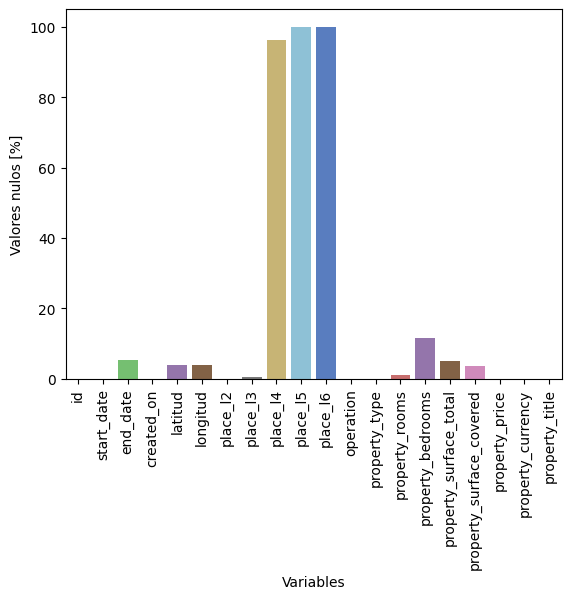

In [79]:
# Calculamos los nulos.
cantidad_de_filas = ds_properati.shape[0]
cantidad_de_nulos = ds_properati.isnull().sum()
porcentaje_de_nulos = (cantidad_de_nulos / cantidad_de_filas) * 100

# Armamos el grafico de porcentajes.
sns.barplot(x = porcentaje_de_nulos.index,
            y = porcentaje_de_nulos.values,
            palette = "muted")

plt.xlabel("Variables") # Leyenda eje x
plt.ylabel("Valores nulos [%]") # Leyenda eje y
plt.xticks(rotation = 90) # Rotacion de los indices en el eje X

# Muestro la grafica.
plt.show()

Borramos las variables innecesarias.

In [80]:
variables_a_borrar = [
    "id",
    "property_currency",
    "operation",
    "place_l2",
    "place_l4",
    "place_l5",
    "place_l6",
    "property_title",
    "created_on"
    ]

ds_properati.drop(variables_a_borrar, axis=1, inplace = True)

In [81]:
ds_properati.head()

,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,2021-09-09,2021-09-26,NaN,NaN,NaN,Casa,4.0,3.0,171.0,133.0,210000.0
1,2021-09-09,2021-09-26,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.0,55.0,82900.0
2,2021-09-09,2021-09-28,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.0,70.0,99000.0
3,2021-09-09,2022-01-05,-34.610027,-58.401934,Once,Departamento,4.0,2.0,NaN,104.0,146000.0
4,2021-09-09,2022-03-09,-34.631621,-58.416825,Boedo,PH,4.0,2.0,NaN,73.0,250000.0


#### 2.1.4. Analisis grafico

En esta sección vamos a realizar un análisis gráfico de las distribuciones de las variables más relevantes.

Graficamos algunas variables cualitativas para su interpretación mediante graficos

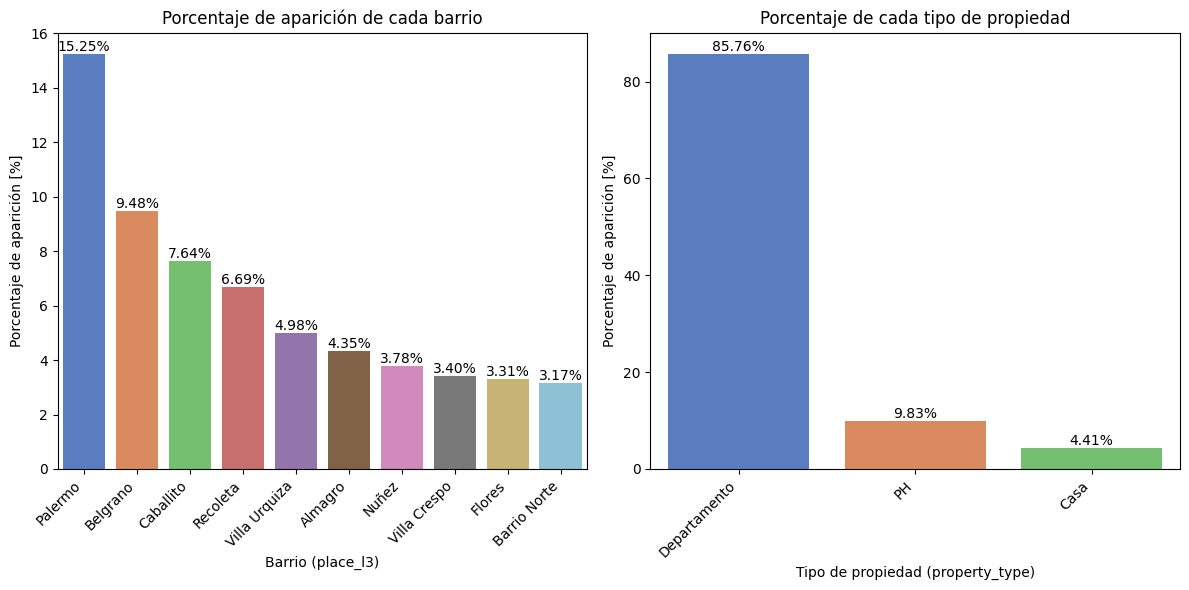

In [134]:
# Porcentaje de aparición de cada barrio en un TOP 10
barrios_top = (ds_properati["place_l3"].value_counts(normalize=True) * 100).head(10)

# Porcentaje de cada tipo de propiedad publicada.
tipos_de_propiedad = ds_properati["property_type"].value_counts(normalize=True) * 100

# Creo una figura para almacenar mis  dos subgráficos
plt.figure(figsize=(12, 6))


# Subgráfico 1 - Barrios TOP 10
plt.subplot(1, 2, 1) # Ubico la grafica en la fila 1, columna 1

# Grafico mis datos.
sns.barplot(x=barrios_top.index,
            y=barrios_top.values,
            palette="muted")

# Agrego etiquetas de porcentaje en las barras
for index, value in enumerate(barrios_top):
    plt.text(index, value, f'{value:.2f}%', ha="center", va="bottom")

plt.xticks(rotation=45, ha="right") # roto las etiquetas del eje X
plt.xlabel("Barrio (place_l3)") # agrego un label al eje x
plt.ylabel("Porcentaje de aparición [%]") # agrego un label al eje y
plt.title('Porcentaje de aparición de cada barrio')


# Subgráfico 2 - Tipos de propiedad
plt.subplot(1, 2, 2) # Ubico la grafica en la fila 1, columna 2

# Grafico mis datos.
sns.barplot(x = tipos_de_propiedad.index,
            y = tipos_de_propiedad,
            palette="muted")

# Agrego etiquetas de porcentaje en las barras
for index, value in enumerate(tipos_de_propiedad):
    plt.text(index, value, f'{value:.2f}%', ha="center", va="bottom")

plt.xticks(rotation=45, ha="right") # roto las etiquetas del eje X
plt.xlabel("Tipo de propiedad (property_type)") # agrego un label al eje x
plt.ylabel("Porcentaje de aparición [%]") # agrego un label al eje y
plt.title("Porcentaje de cada tipo de propiedad")


plt.tight_layout() # Ajusto el diseño de los subgraficos
plt.show() # Imprimo el resultado.

Como vemos, la gran mayoria de nuestras publicaciones son departamentos y cerca del 62% de nuestras publicaciones estan representadas en el TOP 10 de barrios.

Graficamos algunas variables cuantitativas para su interpretación mediante graficos

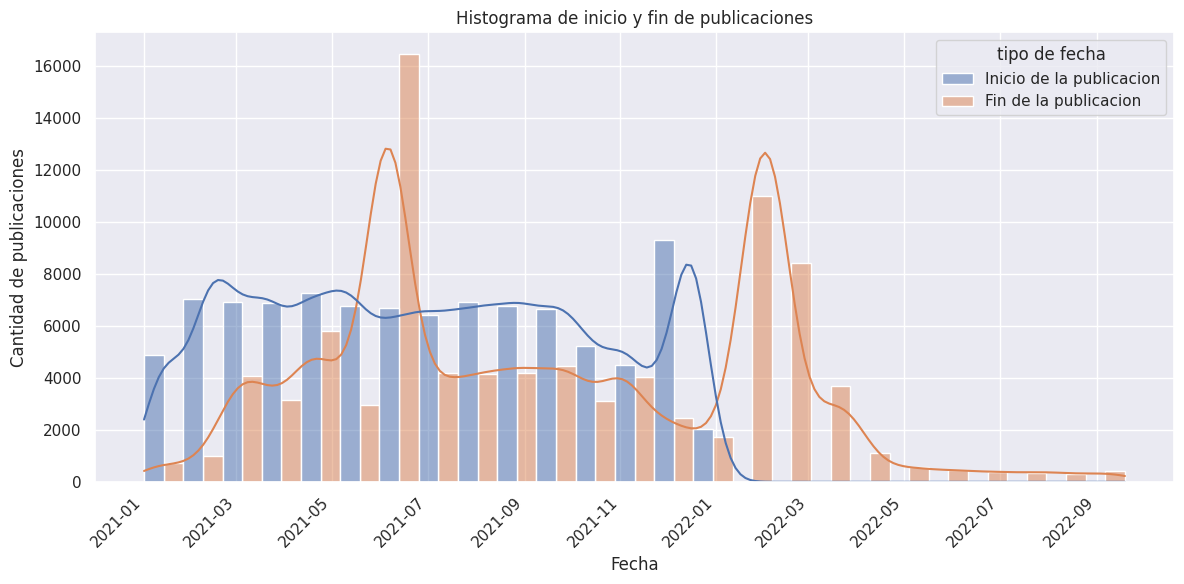

In [217]:
# Creo una figura para almacenar mis  dos subgráficos
plt.figure(figsize=(12, 6))

# Me quedo solo con las fechas de inicio y de fin
fecha_inicio = ds_properati["start_date"]
fecha_fin = ds_properati['end_date']

# Armo un dataframe que tenga todas las fechas e indique que tipo de fecha es.
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'fecha': fecha_inicio.values, 'tipo de fecha': 'Inicio de la publicacion'}),
    pd.DataFrame.from_dict({'fecha': fecha_fin.values, 'tipo de fecha': 'Fin de la publicacion'})
])

sns.histplot(
    bins = 25,
    data = df,
    x = "fecha", # toma la data de la variable fecha
    hue = "tipo de fecha", # separame entre los que empieza y los que terminan
    multiple = "dodge", # separame las barras de inicio y fin (Si pongo stack las apila)
    kde = True # Agregame la densidad.
)

plt.xticks(rotation=45, ha="right") # roto las etiquetas del eje X
plt.xlabel("Fecha") # agrego un label al eje x
plt.ylabel("Cantidad de publicaciones") # agrego un label al eje y
plt.title("Histograma de inicio y fin de publicaciones")

plt.tight_layout() # Ajusto el diseño
plt.show() # Imprimo el resultado.

Si bien la publicacion de nuevas propiedades es bastante constante a lo largo del año, vemos un claro pico en el mes de diciembre, seguido de un descenso abrupto en enero.

Asi tambien, vemos unos picos muy pronunciados en Julio y Febrero en cuanto a la finalizacion de las publicaciones.

<font color=red>estaria bueno agregar un par de graficas que muestren cosas como Ambientes vs precios o quizas barrio vs precio (quizas esta ultima este mas dificil</font>

#### 2.1.5. Analisis de las correlaciones entre las variables

Hacemos un Heatmap con las variables cuantativas para buscar correlaciones.

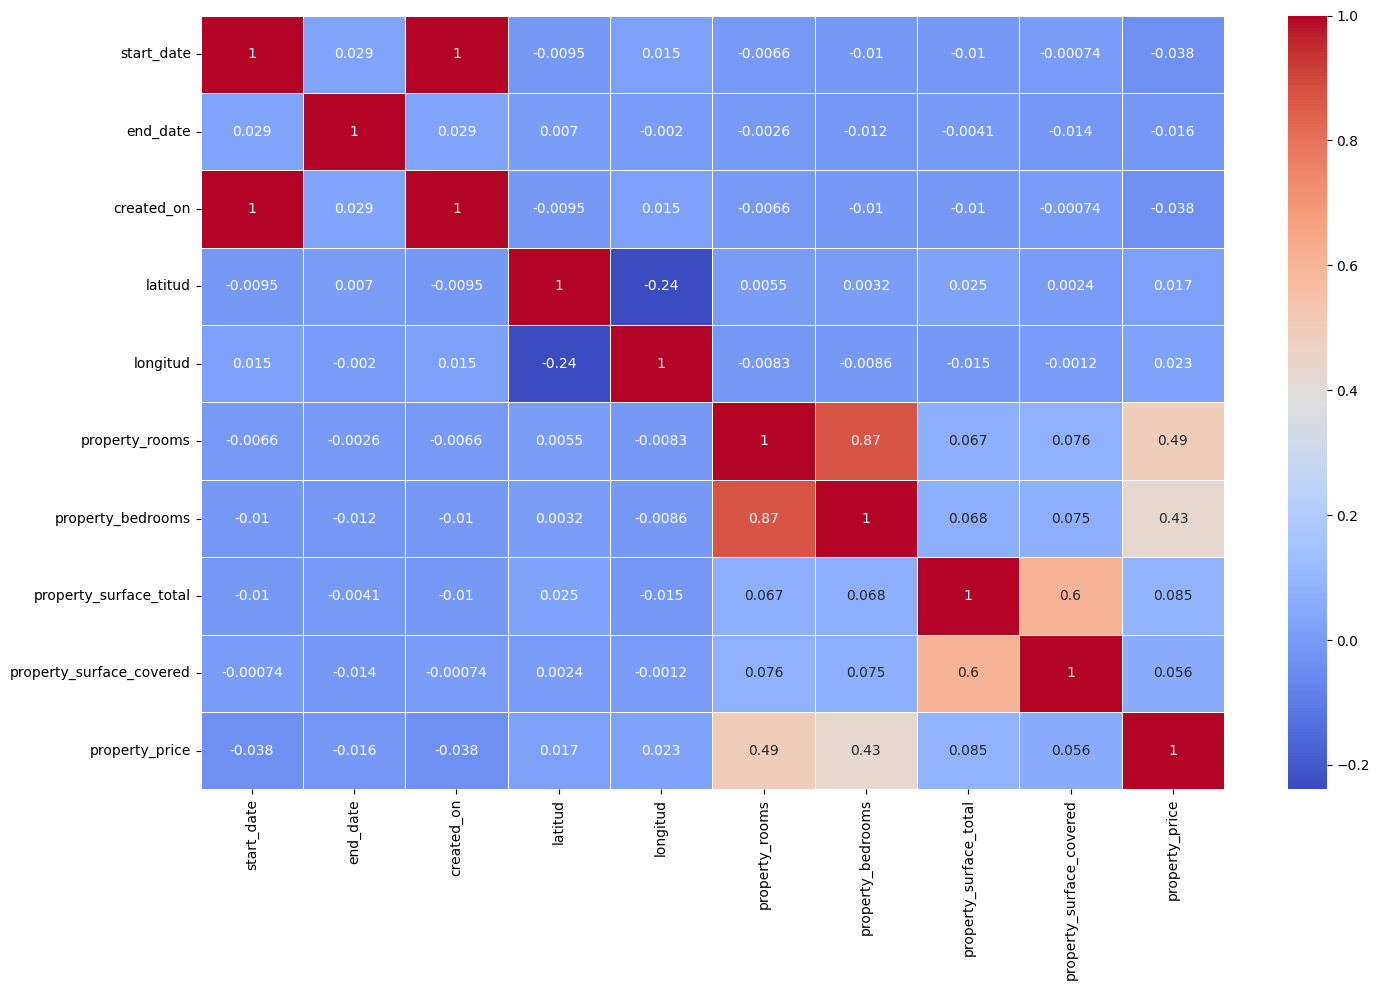

In [ ]:
# Saco las variables nominales para hacer un heatmap
datos = ds_properati.drop(["place_l3","property_type"], axis=1).copy()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data = datos.corr(),
            annot = True,
            cmap = "coolwarm",
            linewidths = 0.5,
            ax = ax)

fig.tight_layout()

**En el grafico podemos observar las siguientes relaciones:**

* `property_rooms` y `property_bedrooms`

  Podemos observar una correlación positiva, lo cual por supuesto es algo esperable, dado que la cantidad de dormitorios de un inmueble siempre estara acotado superiormente por la cantidad de ambientes.

* `property_surface_covered` y `property_surface_total`

  Al igual que en el caso anterior, observamos una correlacion positiva esperable, dado que la superfie total cubierta siempre estara acotada superiormente por la superfie total del inmueble.

* `property_rooms` y `property_price`

  Finalmente, observamos una correlación positiva entre la cantidad de ambientes y el precio de la propiedad. Lo cual, era algo esperable.

Vamos a analizar estas variables mas en profundidad a traves de graficas de dispersión

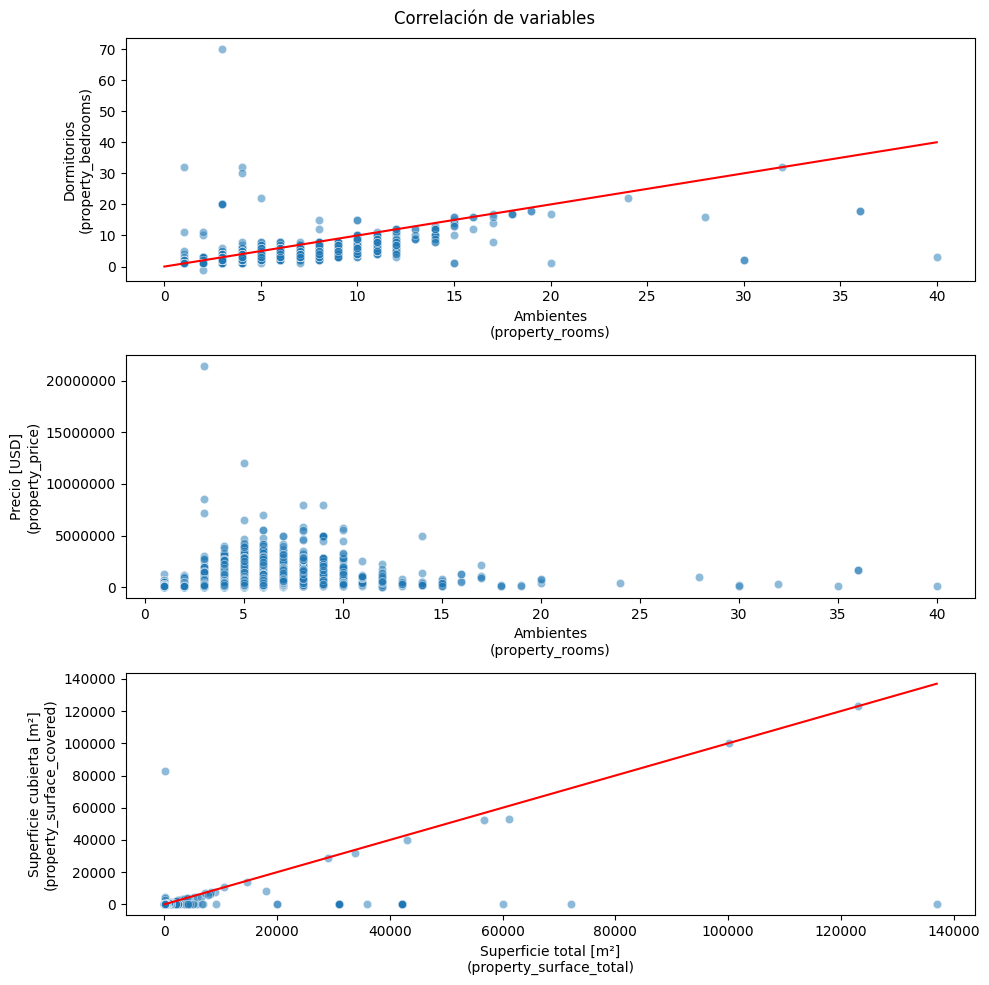

In [ ]:
grafica, ax = plt.subplots(3, 1, figsize=(10, 10))
grafica.suptitle("Correlación de variables")

# Armamos un dataframe con las variables a comparar.
df_para_correlaciones = ds_properati[["property_rooms",
                                      "property_bedrooms",
                                      "property_surface_covered",
                                      "property_surface_total",
                                      "property_price"]]

# 1- Graficamos ambientes vs habitaciones.
sns.scatterplot(x = "property_rooms",
                y = "property_bedrooms",
                data = df_para_correlaciones,
                alpha = 0.5,
                ax = ax[0]
                ).set(xlabel = "Ambientes\n(property_rooms)",
                      ylabel = "Dormitorios\n(property_bedrooms)")

# Agrego una recta que marca cuantas habitaciones puede tener como maximo
# una propiedad. Pues ninguna propiedad puede tener mas habitaciones que ambientes.
ambientes_max = df_para_correlaciones["property_rooms"].max()
sns.lineplot(x = [0, ambientes_max],
             y = [0, ambientes_max],
             c = 'Red',
             ax = ax[0]
             )


# 2- Graficamos ambientes vs precio.
sns.scatterplot(x = "property_rooms",
                y = "property_price",
                data = df_para_correlaciones,
                alpha = 0.5,
                ax = ax[1]
                ).set(xlabel = "Ambientes\n(property_rooms)",
                      ylabel = "Precio [USD]\n(property_price)")

# Esta linea es para que no muestre el precio en dolares en notación cientifica.
ax[1].ticklabel_format(style="plain", axis="both")


# 3- Graficamos superficie vs superficie cubierta
sns.scatterplot(x = "property_surface_total",
                y = "property_surface_covered",
                data = df_para_correlaciones,
                alpha = 0.5,
                ax = ax[2]
                ).set(xlabel="Superficie total [m²]\n(property_surface_total)",
                      ylabel="Superficie cubierta [m²]\n(property_surface_covered)")

# Agrego una recta que marca la superficie cubierta maxima que puede tener una
# propiedad. Pues ninguna propiedad puede tener mas superficie cubierta que total.
superficie_max = df_para_correlaciones["property_surface_total"].max()
sns.lineplot(x = [0, superficie_max],
             y = [0, superficie_max],
             c = 'Red',
             ax = ax[2]
             )


grafica.tight_layout()


Como podemos observar, hay algunos posibles valores atipicos en ciertas variables.

Por nombrar algunas cosas que se notan a simple vista:

* En la grafica de `property_rooms` vs `property_bedrooms` claramente tenemos publicaciones con mas dormitorios que ambientes, lo cual no es posible. Ademas vemos que hay algunas publicaciones de hasta 40 ambientes.

* En la grafica `property_rooms` vs `property_price` hay publicaciones de 5 ambientes o menos que estan publicadas a un precio por encima de los 10 millones de dolares.

* En la grafica `property_surface_total` vs `property_surface_covered` vemos que hay publicaciones con mas $m^2$ cubiertos que totales. Lo cual es imposible.

Ya nos encargaremos de filtrar esto mas adelante.


### 2.2. Visualización de los datos

En esta sección se realiza una primera aproximación a los datos apoyándose en visualizaciones, por ejemplo: gráficos de dispersión entre variables, histogramas, heatmaps, exploración de las columnas, etc.

<Figure size 900x900 with 0 Axes>

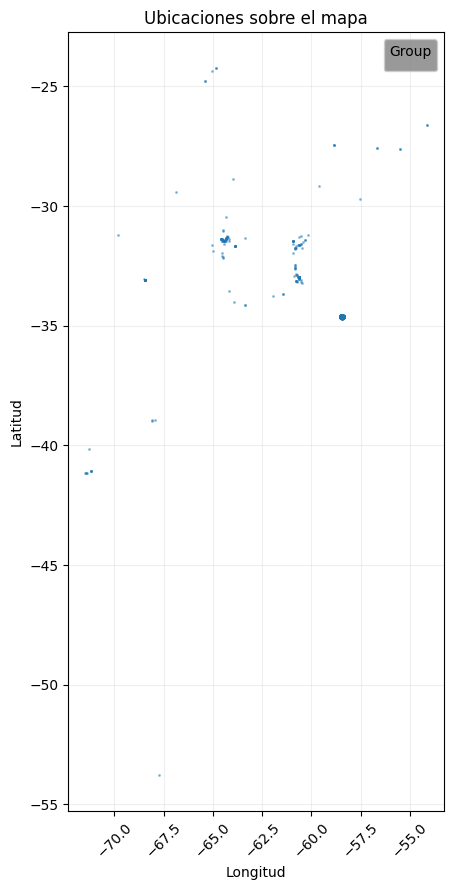

In [ ]:
import geopandas as gpd

plt.figure(figsize=(9,9))

barrios = gpd.read_file('barrios.geojson')
p = gpd.GeoSeries(barrios.geometry)
p.plot(color='0.75', edgecolor='white', figsize=(9,9))

plt.scatter(x=ds_properati.longitud, y=ds_properati.latitud, cmap='viridis', marker='.', s=5, alpha=0.4)
plt.title('Ubicaciones sobre el mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(alpha=0.2)
plt.tick_params(axis='x', labelrotation = 45)
plt.legend(title='Group', markerscale=5, frameon=True, facecolor='0.5')

plt.show()